In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
freqs = [2.,7.,18.,35.,60.,70.,90.,110.,120.,130,140]
freq_ranges = list(zip(freqs[:-1], freqs[1:]))
scores = []
time_config = [
    (1,0.2,1200,0),
    (3,0.2,300,0),
    (3,0.4,500,200),
    (3,0.4,400,200),
    (3,0.4,300,100),
]
components = [0.65, 0.75, 0.85]
freq_tags = ['7','18','35','60','70','90','110','120','130','140Hz']

In [10]:
directory = os.fsencode(os.path.abspath(os.getcwd()))
left_rest_scores = []
for dr in os.listdir(directory):
    if os.path.isdir(dr) :
        for file in os.listdir(dr):
            if 'scores_pca_UN_left_rest' in str(file) :
                scr = np.load(str(dr).split("'")[1]+'/'+str(file).split("'")[1])
                left_rest_scores.append(scr)

In [5]:
subjets = np.array(left_rest_scores).shape[0]
scores = np.array(left_rest_scores)

In [6]:
medians = scores.transpose(3,1,2,0,4)
medians = np.apply_along_axis(np.median, 3, medians)
medians = medians.transpose(2,1,0,3)

In [65]:
medians.shape

(5, 3, 10, 5)

In [48]:
np.max(medians[0,0])

0.6041666666666666

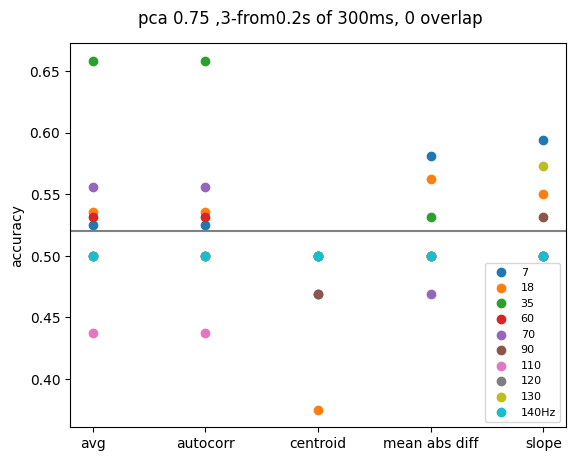

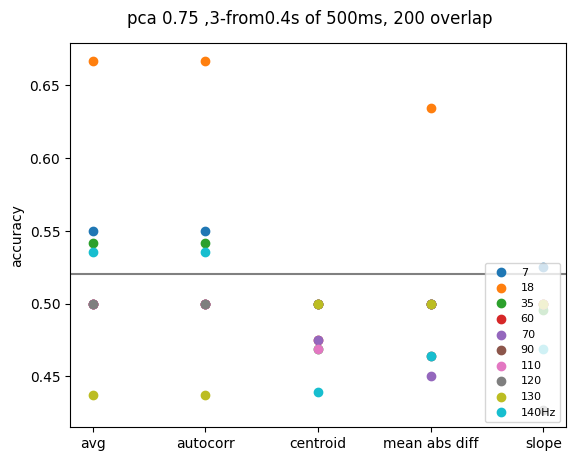

In [9]:
features = ['avg', 'autocorr', 'centroid', 'mean abs diff', 'slope']
i=0
for pca in components:
    j=0
    for cnf in time_config:
        n_windows, t_min, width, overlap = time_config[j]
        media = medians[j,i]
        if np.max(media) > 0.65:
            pca_fig, axes = plt.subplots(1)
            pca_fig.suptitle('pca {} ,{}-from{}s of {}ms, {} overlap'.format(pca,n_windows,t_min,width,overlap))
            for f,freq in enumerate(freq_tags):
                axes.scatter(features, media[f,:])
            axes.legend(freq_tags, loc='lower right', prop={'size':8})
            axes.set_ylabel('accuracy')
            axes.axhline(.52, c='grey')
            pca_fig.subplots_adjust(top=0.91)
            axes.set_xticks([0,1,2,3,4])
            axes.set_xticklabels(features)
        j+=1
    i+=1

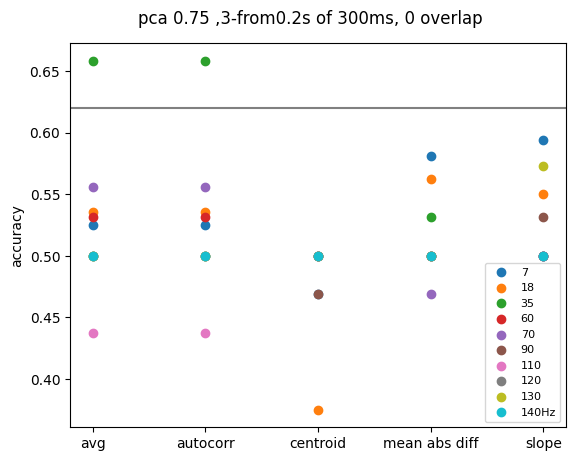

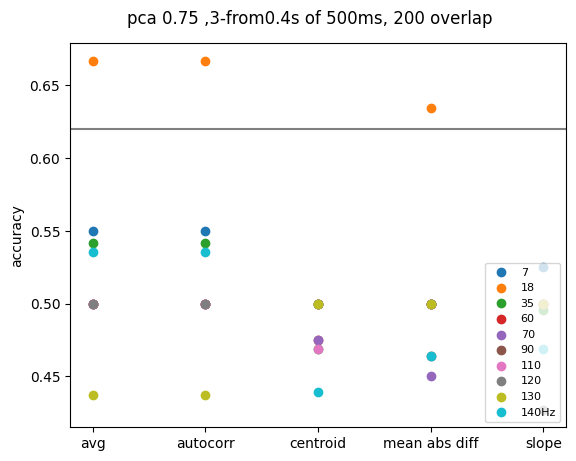

In [11]:
features = ['avg', 'autocorr', 'centroid', 'mean abs diff', 'slope']
i=0
for pca in components:
    j=0
    for cnf in time_config:
        n_windows, t_min, width, overlap = time_config[j]
        media = medians[j,i]
        if np.max(media) > 0.65:
            pca_fig, axes = plt.subplots(1)
            pca_fig.suptitle('pca {} ,{}-from{}s of {}ms, {} overlap'.format(pca,n_windows,t_min,width,overlap))
            for f,freq in enumerate(freq_tags):
                axes.scatter(features, media[f,:])
            axes.legend(freq_tags, loc='lower right', prop={'size':8})
            axes.set_ylabel('accuracy')
            axes.axhline(.62, c='grey')
            pca_fig.subplots_adjust(top=0.91)
            axes.set_xticks([0,1,2,3,4])
            axes.set_xticklabels(features)
        j+=1
    i+=1